In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

In [ ]:
sp500_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'BRK.B', 'V', 'JPM', 'UNH', 'HD', 'PYPL', 'DIS', 'MA', 'PG',
    'VZ', 'NFLX', 'INTC', 'KO', 'PEP', 'BA', 'XOM', 'CVX', 'CSCO', 'WMT', 'T', 'MCD', 'ORCL', 'CAT', 'MRK', 'COST',
    'GE', 'BABA', 'ABBV', 'ADBE', 'AXP', 'CRM', 'AMGN', 'INTU', 'AMT', 'NKE', 'GS', 'WBA', 'SBUX', 'CSX', 'LMT', 'MDT', 'GS',
    'SPGI', 'BIIB', 'LUV', 'UNP', 'ISRG', 'CI', 'CVS', 'TMO', 'HON', 'LRCX', 'SHW', 'RTX', 'MMM', 'BKNG', 'ITW', 'FISV', 'MU',
    'QCOM', 'CHTR', 'STZ', 'TSCO', 'F', 'DE', 'NEE', 'MS', 'ZTS', 'WFC', 'PLD', 'AON', 'BMY', 'MMC', 'FIS', 'KHC', 'SLB', 'APD',
    'MDLZ', 'CHD', 'HUM', 'AIG', 'EL', 'SYK', 'HCA', 'DUK', 'ALL', 'C', 'OXY', 'HPE', 'SPG', 'SYY', 'VLO', 'ES', 'VMC', 'FTNT',
    'DHR', 'EOG', 'IT', 'AFL', 'NOC', 'COP', 'GILD', 'VRTX', 'WDC', 'MSCI', 'ADP', 'EXC', 'FANG', 'ZBH', 'CTSH', 'NEM', 'LHX',
    'DOW', 'BKR', 'APTV', 'TDG', 'CHKP', 'KMB', 'IQV', 'PFE', 'MU', 'BIIB', 'RMD', 'WEC', 'VFC', 'CME', 'LULU', 'MCK', 'ROST',
    'DG', 'O', 'TGT', 'SWKS', 'TROW', 'PKI', 'AEP', 'PEP', 'STT', 'MCO', 'AIZ', 'DHI', 'CTAS', 'SPGI', 'ADSK', 'FSLR', 'HIG',
    'CSX', 'NUE', 'TMUS', 'FTV', 'EXPD', 'BAX', 'MTD', 'SWK', 'ETN', 'MMC', 'FCX', 'KSU', 'PSX', 'WMT', 'RSG', 'LNC', 'PLUG',
    'TWTR', 'SQ', 'GOOG', 'MELI', 'DOCU', 'SPOT', 'BIDU', 'UBER', 'LYFT', 'PINS', 'SNAP', 'SQ', 'FSLR', 'SPLK', 'NVDA', 'PYPL',
    'RNG', 'VEEV', 'ZS', 'ZM', 'DOCU', 'MDB', 'PINS', 'COST', 'NTES', 'ROKU', 'INTC', 'COST', 'MRNA', 'VEEV', 'SHOP', 'FVRR',
    'WBA', 'NKE', 'TMO', 'IDXX', 'SWKS', 'MCD', 'AEP', 'AMT', 'EXC', 'KLAC', 'AON', 'VRTX', 'LULU', 'ZBH', 'HCA', 'FISV',
    'TGT', 'MU', 'AMT', 'UNP', 'CME', 'VFC', 'SYY', 'SYK', 'CVS', 'SBUX', 'PFE', 'TROW', 'NEE', 'SPLK', 'FIS', 'FANG', 'PNC',
    'TXN', 'CSCO', 'TMO', 'PGR', 'AMGN', 'SHOP', 'V', 'KMB', 'ROST', 'DXC', 'TAP', 'IDXX', 'BAX', 'LMT', 'RMD', 'ITW', 'RSG',
    'REGN', 'COST', 'LMT', 'DHR', 'JPM', 'C', 'LUV', 'HUM', 'APD', 'MS', 'HCA', 'WDC', 'ABT', 'COST', 'AMZN', 'MA', 'MSFT', 'VZ',
    'PFE', 'WMT', 'BMY', 'ZTS', 'GD', 'WFC', 'CHTR', 'GILD', 'FIS', 'ZBH', 'BIIB', 'LOW', 'NEE', 'VEEV', 'SWK', 'BA', 'MSCI',
    'AVGO', 'GS', 'MU', 'UNH', 'DE', 'KHC', 'EXC', 'XOM', 'PYPL', 'LHX', 'LULU', 'CVS', 'GE', 'DOW', 'BABA', 'MDT', 'AAPL',
    'HCA', 'BA', 'BAX', 'SBUX', 'NOC', 'LLY', 'ROKU', 'CHKP', 'SNAP', 'WEC', 'EL', 'COF', 'WMT', 'ZBH', 'PEP', 'EXPD', 'PLD',
    'SPGI', 'MRNA', 'AMGN', 'HD', 'INTC', 'BIIB', 'ORCL', 'PG', 'CME', 'FCX', 'ALGN', 'MMM', 'V', 'BMY', 'STZ', 'DHR', 'VMC',
    'COP', 'NTES', 'RTX', 'KO', 'GE', 'JNJ', 'AVGO', 'NSC', 'EOG', 'GPN', 'ADP', 'SYY', 'NEE', 'COST', 'SPGI', 'RSG', 'DLR',
    'BKR', 'SPLK', 'PLD', 'VFC', 'TMO', 'LMT', 'EOG', 'CVS', 'NEM', 'MRK', 'AMGN', 'GOOG', 'CAT', 'AIG', 'CVX', 'CVS', 'AIG',
    'TROW', 'CSX', 'MMC', 'RMD', 'HON', 'ZTS', 'AXP', 'T', 'ADSK', 'FTV', 'LHX', 'MSCI', 'PFE', 'DXC', 'LULU', 'PG', 'AMT',
    'BAX', 'CSCO', 'HCA', 'DIS', 'VZ', 'IQV', 'EXC', 'AXP', 'REGN', 'CTAS', 'WEC', 'FISV', 'UNP', 'PEP', 'VLO', 'NKE', 'TRV',
    'GE', 'NUE', 'NEE', 'INTC', 'ALXN', 'AON', 'IDXX', 'AAPL', 'WMT', 'TMO', 'MDT', 'HON', 'XOM', 'LMT', 'SBUX', 'MMM', 'KMB',
    'APD', 'WDC', 'MSCI', 'ZTS', 'KHC', 'GS', 'AIG', 'BMY', 'PYPL', 'WFC', 'LUV', 'PG', 'AMGN', 'ZBH', 'NVDA', 'TGT', 'CRM'
]



In [ ]:
# data = yf.download(sp500_tickers, start='2000-01-01', end='2025-04-01', auto_adjust=True)

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'wb') as f:
#     pickle.dump(data, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'rb') as file:
    data = pickle.load(file)

In [ ]:
df_sp500_price = data['Close'].dropna(axis=1).dropna()

In [ ]:
df_sp500_return = data['Close'].dropna(axis=1).dropna().pct_change().dropna()

In [ ]:
df_sp500_return.head()

Ticker,AAPL,ABT,ADBE,ADP,ADSK,AEP,AFL,AIG,ALL,AMGN,...,VLO,VMC,VRTX,VZ,WBA,WDC,WEC,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.084310,-0.028571,-0.083889,0.000000,-0.048689,0.011929,-0.026535,-0.051112,-0.031915,-0.076465,...,-0.009803,-0.003175,-0.079867,-0.032325,-0.037199,0.190476,0.006557,-0.049521,-0.037418,-0.019154
2000-01-05,0.014633,-0.001838,0.019771,-0.009616,-0.062992,0.037327,-0.005740,0.002376,0.043956,0.034409,...,0.036304,0.066880,-0.016275,0.033405,0.011364,-0.066667,0.045602,-0.010084,-0.020409,0.054515
2000-01-06,-0.086539,0.034991,0.008163,0.013350,-0.060924,0.005683,0.020203,0.030504,-0.005263,0.016632,...,0.031847,0.001492,-0.014706,-0.005079,-0.029214,0.042857,-0.003115,0.044142,0.010913,0.051698
2000-01-07,0.047369,0.010676,0.048583,0.022754,0.118568,0.013182,0.019802,0.074846,0.037037,0.112474,...,-0.012346,0.002981,0.087687,-0.007384,0.025463,0.232876,0.012500,0.017886,0.075565,-0.002934
2000-01-10,-0.017588,-0.007042,0.038610,0.024591,-0.010099,-0.003717,-0.059639,-0.017694,-0.022959,0.060662,...,-0.003125,0.040118,0.030875,-0.005313,0.029346,-0.111111,0.000000,-0.031949,-0.018249,-0.013981


In [ ]:
df_sp500_tmp_close = data['Close']
df_sp500_tmp_volume = data['Volume']

In [ ]:
df_sp500_tradingval_tmp = df_sp500_tmp_close * df_sp500_tmp_volume
df_sp500_tradingval = df_sp500_tradingval_tmp.dropna(axis=1).dropna()

In [ ]:
layers = [df_sp500_price.head(10), df_sp500_return.head(10), df_sp500_tradingval.head(10)]

In [ ]:
def granger_causality_all_pairs(df, max_lag=[1]):
    cols = df.columns

    num_columns = len(cols)
    p_values = np.zeros((num_columns, num_columns))

    for i in range(num_columns):
        for j in range(num_columns):
            if i != j:
                try:
                    result = grangercausalitytests(df[[df.columns[i], df.columns[j]]], max_lag)
                except:
                    print(" ======================== Exception ======================== ")
                    print(i,j)
                    print(df[[df.columns[i], df.columns[j]]])
                    input("Pass exception")
                    pass
                p_values[i, j] = result[1][0]['ssr_chi2test'][1]  # p-value of the test

    return p_values

In [ ]:
layers_p_val = []
# for layer in layers:
#   p_values_matrix = granger_causality_all_pairs(layer, max_lag=1)
#   layers_p_val.append(p_values_matrix)


In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'wb') as f:
#     pickle.dump(layers_p_val, f)

In [ ]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'rb') as file:
    layers_p_val = pickle.load(file)

In [ ]:
# # Plotting
# plt.imshow(p_values_matrix, cmap='coolwarm', interpolation='none')
# plt.colorbar(label='p-value')
# plt.title("Granger Causality Test P-values (t vs t-1) for NASDAQ-100 Securities")

# # Show the plot
# plt.tight_layout()

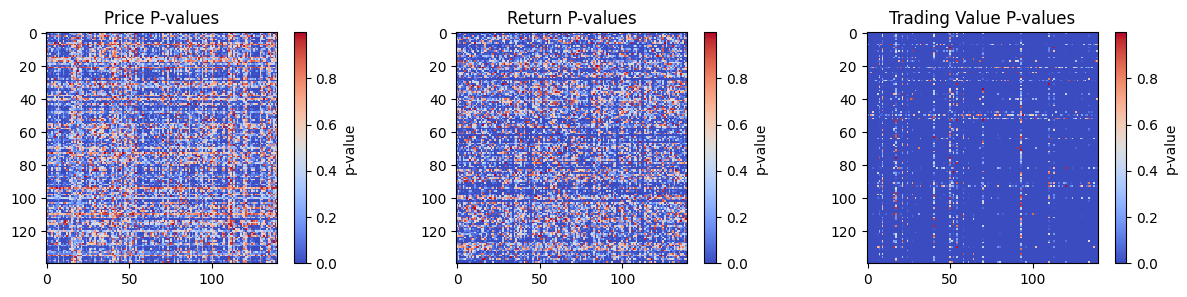

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 3))

axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none')
axs[0].set_title('Price P-values')
fig.colorbar(axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none'), ax=axs[0], label='p-value')


axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none')
axs[1].set_title('Return P-values')
fig.colorbar(axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none'), ax=axs[1], label='p-value')


axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none')
axs[2].set_title('Trading Value P-values')
fig.colorbar(axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none'), ax=axs[2], label='p-value')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

def build_weighted_adjacency_matrix_rf(target_df, feature_df, lag=1, n_estimators=100, random_state=42, n_jobs=-1):
    """
    Build a weighted adjacency matrix using Random Forest feature importances as weights.

    Parameters:
    - target_df: DataFrame of prices (targets)
    - feature_df: DataFrame of volumes (features)
    - lag: How many time steps to shift feature_df
    - n_estimators: Number of trees in the forest
    - random_state: Random seed for reproducibility
    - n_jobs: Number of jobs to run in parallel (use -1 for all cores)

    Returns:
    - weighted_adjacency_df: DataFrame (targets x features), weighted by feature importance
    """
    feature_df_shifted = feature_df.shift(lag)

    # Function to calculate feature importances for each target column
    def compute_feature_importances(target_col):
        df_combined = pd.concat([feature_df_shifted, target_df[target_col]], axis=1).dropna()
        X = df_combined[feature_df.columns]
        y = df_combined[target_col]

        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        rf.fit(X, y)
        return pd.Series(rf.feature_importances_, index=X.columns)

    # Set up tqdm with joblib's Parallel to show progress bar
    # The `tqdm` wraps the iterator to display progress for parallel execution
    adjacency_data = Parallel(n_jobs=n_jobs)(
        delayed(compute_feature_importances)(target_col)
        for target_col in tqdm(target_df.columns, desc="Processing target columns")
    )

    # Create weighted adjacency matrix
    weighted_adjacency_df = pd.DataFrame(adjacency_data, index=target_df.columns, columns=feature_df.columns)
    print(weighted_adjacency_df)
    return weighted_adjacency_df


In [ ]:
df_sp500_tradingval.columns = [col + '_tradingval' for col in df_sp500_tradingval.columns]
df_sp500_price.columns = [col + '_price' for col in df_sp500_price.columns]


result = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[0:100]], \
                                            df_sp500_tradingval[df_sp500_tradingval.columns[0:100]], \
                                            lag=1, \
                                            n_estimators=100, \
                                            random_state=42)

Processing target columns: 100%|██████████| 100/100 [1:28:45<00:00, 53.25s/it]




            AAPL_tradingval  ABT_tradingval  ADBE_tradingval  ADP_tradingval  \
AAPL_price         0.002680        0.000117         0.000871        0.000161   
ABT_price          0.000597        0.000162         0.002727        0.000137   
ADBE_price         0.001934        0.000176         0.003016        0.000325   
ADP_price          0.000454        0.000161         0.001289        0.000092   
ADSK_price         0.001139        0.000142         0.002666        0.000286   
...                     ...             ...              ...             ...   
PEP_price          0.010059        0.000292         0.000195        0.000089   
PFE_price          0.002817        0.000297         0.013948        0.000242   
PG_price           0.014811        0.000160         0.001470        0.000065   
PGR_price          0.000998        0.000100         0.001233        0.000096   
PLD_price          0.001795        0.000171         0.003940        0.000161   

            ADSK_tradingval  AEP_tradin

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_0_100.pkl', 'wb') as f:
#     pickle.dump(result, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_0_100.pkl', 'rb') as file:
    result = pickle.load(file)

number of connection: 87
[82, 111, 211, 311, 591, 691, 792, 891, 991, 1091, 1111, 1491, 1591, 1691, 1792, 1891, 2092, 2192, 2291, 2391, 2491, 2591, 2691, 2791, 2891, 2911, 3091, 3182, 3292, 3392, 3491, 3582, 3691, 3782, 3892, 3991, 4111, 4292, 4391, 4491, 4611, 4848, 4991, 5192, 5291, 5391, 5491, 5591, 5691, 5782, 5891, 5982, 6091, 6191, 6291, 6391, 6491, 6592, 6691, 6791, 6891, 6991, 7182, 7282, 7392, 7491, 7591, 7682, 7791, 7882, 7992, 8191, 8282, 8391, 8511, 8711, 8891, 8991, 9091, 9191, 9292, 9391, 9492, 9591, 9691, 9891, 9982]


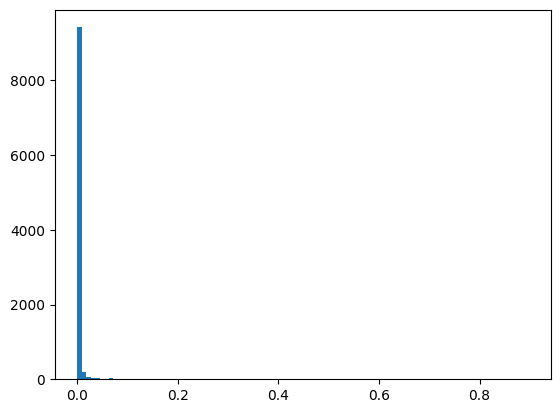

In [ ]:
df_temp11 = result.to_numpy().flatten()
print(f"number of connection: {len(df_temp11[df_temp11>0.5])}")

# Condition: find indices of values greater than 30
indices = [index for index, value in enumerate(df_temp11) if value > 0.5]

print(indices)

plt.hist(df_temp11,bins=100)
plt.show()

In [ ]:
result.idxmax(axis=1).drop_duplicates()

,0
AAPL_price,MSFT_tradingval
ABT_price,AMZN_tradingval
ADSK_price,NVDA_tradingval
AIG_price,O_tradingval
BKR_price,OXY_tradingval
DXC_price,DXC_tradingval
F_price,MU_tradingval
FCX_price,FCX_tradingval
LNC_price,LUV_tradingval
MRK_price,NEE_tradingval


In [ ]:
result['AMZN_tradingval']

,AMZN_tradingval
AAPL_price,0.000928
ABT_price,0.792567
ADBE_price,0.654579
ADP_price,0.533597
ADSK_price,0.316839
...,...
PEP_price,0.001280
PFE_price,0.006163
PG_price,0.000199
PGR_price,0.013178


In [ ]:
result_part2 = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[0:100]], \
                                            df_sp500_tradingval[df_sp500_tradingval.columns[100:]], \
                                            lag=1, \
                                            n_estimators=100, \
                                            random_state=42)

Processing target columns: 100%|██████████| 100/100 [35:58<00:00, 21.58s/it]


            PLUG_tradingval  PNC_tradingval  QCOM_tradingval  REGN_tradingval  \
AAPL_price         0.167183        0.000572         0.003435         0.025602   
ABT_price          0.091442        0.000430         0.003758         0.074748   
ADBE_price         0.108076        0.001351         0.002777         0.005815   
ADP_price          0.092122        0.000667         0.001391         0.075864   
ADSK_price         0.103995        0.000728         0.001881         0.006303   
...                     ...             ...              ...              ...   
PEP_price          0.081504        0.000319         0.000879         0.125888   
PFE_price          0.135187        0.001175         0.003025         0.044729   
PG_price           0.101675        0.000418         0.002569         0.100751   
PGR_price          0.100561        0.000783         0.010886         0.005949   
PLD_price          0.105504        0.000854         0.003214         0.004410   

            RMD_tradingval 

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_100_last.pkl', 'wb') as f:
#     pickle.dump(result_part2, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_100_last.pkl', 'rb') as file:
    result_part2 = pickle.load(file)



In [ ]:
result_part2

,PLUG_tradingval,PNC_tradingval,QCOM_tradingval,REGN_tradingval,RMD_tradingval,ROST_tradingval,RSG_tradingval,RTX_tradingval,SBUX_tradingval,SHW_tradingval,...,VLO_tradingval,VMC_tradingval,VRTX_tradingval,VZ_tradingval,WBA_tradingval,WDC_tradingval,WEC_tradingval,WFC_tradingval,WMT_tradingval,XOM_tradingval
AAPL_price,0.167183,0.000572,0.003435,0.025602,0.002236,0.000691,0.001744,0.001628,0.000548,0.002074,...,0.003873,0.002383,0.003010,0.000546,0.001235,0.001862,0.021123,0.001607,0.002566,0.013778
ABT_price,0.091442,0.000430,0.003758,0.074748,0.000800,0.000895,0.000676,0.001277,0.000589,0.000842,...,0.001474,0.001018,0.000575,0.000285,0.000828,0.000640,0.002071,0.001055,0.000857,0.001532
ADBE_price,0.108076,0.001351,0.002777,0.005815,0.005101,0.001938,0.001135,0.002437,0.000892,0.001263,...,0.004759,0.004042,0.001791,0.000756,0.001294,0.001442,0.007834,0.001311,0.002142,0.003181
ADP_price,0.092122,0.000667,0.001391,0.075864,0.001882,0.001007,0.001178,0.002244,0.000659,0.002063,...,0.011619,0.004602,0.001519,0.000591,0.001207,0.001604,0.002809,0.001353,0.002650,0.011371
ADSK_price,0.103995,0.000728,0.001881,0.006303,0.001546,0.001971,0.000795,0.002070,0.000593,0.001189,...,0.007181,0.004034,0.001431,0.000760,0.001138,0.004059,0.008028,0.001273,0.001744,0.004860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PEP_price,0.081504,0.000319,0.000879,0.125888,0.000670,0.000393,0.000775,0.000947,0.000456,0.000784,...,0.014664,0.010866,0.000563,0.000346,0.001184,0.000609,0.002247,0.000555,0.000433,0.002942
PFE_price,0.135187,0.001175,0.003025,0.044729,0.002056,0.001767,0.001596,0.003132,0.001363,0.001103,...,0.003435,0.008309,0.004284,0.001562,0.000975,0.007011,0.132799,0.004793,0.001852,0.022118
PG_price,0.101675,0.000418,0.002569,0.100751,0.000964,0.000640,0.001434,0.000771,0.000662,0.001025,...,0.005519,0.001748,0.000571,0.000405,0.001234,0.001354,0.001283,0.000648,0.000727,0.005104
PGR_price,0.100561,0.000783,0.010886,0.005949,0.003281,0.001791,0.004573,0.003973,0.000856,0.004663,...,0.003828,0.003473,0.001449,0.000693,0.003374,0.014961,0.002977,0.001993,0.004348,0.062897


In [ ]:
result_part2.idxmax(axis=1)

,0
AAPL_price,SPGI_tradingval
ABT_price,SPGI_tradingval
ADBE_price,SPGI_tradingval
ADP_price,SPGI_tradingval
ADSK_price,SPGI_tradingval
...,...
PEP_price,SPGI_tradingval
PFE_price,STZ_tradingval
PG_price,SPGI_tradingval
PGR_price,SPGI_tradingval


In [ ]:
result_part2.idxmax(axis=1).drop_duplicates()

,0
AAPL_price,SPGI_tradingval
AEP_price,STZ_tradingval
AIG_price,WFC_tradingval
BIIB_price,REGN_tradingval
BKR_price,SLB_tradingval
CHKP_price,WEC_tradingval
COP_price,UNH_tradingval
F_price,PLUG_tradingval
FCX_price,XOM_tradingval


In [ ]:
result_part3 = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[100:]], \
                                            df_sp500_tradingval[df_sp500_tradingval.columns], \
                                            lag=1, \
                                            n_estimators=100, \
                                            random_state=42)

Processing target columns: 100%|██████████| 40/40 [46:58<00:00, 70.47s/it]


            AAPL_tradingval  ABT_tradingval  ADBE_tradingval  ADP_tradingval  \
PLUG_price         0.001839        0.000104         0.000412        0.000378   
PNC_price          0.006954        0.000235         0.000563        0.000126   
QCOM_price         0.009016        0.000138         0.000232        0.000188   
REGN_price         0.000441        0.000193         0.000212        0.000203   
RMD_price          0.001900        0.000061         0.002670        0.000113   
ROST_price         0.000429        0.000069         0.001758        0.000224   
RSG_price          0.000666        0.000066         0.000745        0.000063   
RTX_price          0.019165        0.000407         0.001214        0.000109   
SBUX_price         0.000440        0.000133         0.000182        0.000051   
SHW_price          0.000151        0.000074         0.001200        0.000068   
SLB_price          0.096190        0.000592         0.006296        0.001803   
SPG_price          0.002227        0.000

In [ ]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_100_last_feature_0_last.pkl', 'wb') as f:
    pickle.dump(result_part3, f)

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_100_last_feature_0_last.pkl', 'rb') as file:
#     result_part3 = pickle.load(file)

In [ ]:
result_part3

,AAPL_tradingval,ABT_tradingval,ADBE_tradingval,ADP_tradingval,ADSK_tradingval,AEP_tradingval,AFL_tradingval,AIG_tradingval,ALL_tradingval,AMGN_tradingval,...,VLO_tradingval,VMC_tradingval,VRTX_tradingval,VZ_tradingval,WBA_tradingval,WDC_tradingval,WEC_tradingval,WFC_tradingval,WMT_tradingval,XOM_tradingval
PLUG_price,0.001839,0.000104,0.000412,0.000378,0.005263,0.000926,0.000380,0.000196,0.000398,0.001726,...,0.000537,0.000430,0.000654,0.000356,0.000534,0.000640,0.000296,0.006333,0.000305,0.000309
PNC_price,0.006954,0.000235,0.000563,0.000126,0.000183,0.000145,0.000126,0.001924,0.000098,0.000225,...,0.001432,0.000225,0.000429,0.000118,0.000232,0.000617,0.000320,0.000672,0.000624,0.000632
QCOM_price,0.009016,0.000138,0.000232,0.000188,0.000242,0.000361,0.000180,0.001345,0.000136,0.000125,...,0.000528,0.000140,0.000181,0.000112,0.000171,0.001642,0.000124,0.000266,0.000148,0.000483
REGN_price,0.000441,0.000193,0.000212,0.000203,0.000110,0.000109,0.000148,0.000862,0.000102,0.000086,...,0.000772,0.000167,0.000335,0.000230,0.000188,0.000670,0.000147,0.000130,0.000277,0.000229
RMD_price,0.001900,0.000061,0.002670,0.000113,0.000111,0.000114,0.000157,0.000329,0.000086,0.000111,...,0.000716,0.000146,0.000151,0.000059,0.000166,0.000373,0.000111,0.000221,0.000184,0.000966
ROST_price,0.000429,0.000069,0.001758,0.000224,0.000067,0.000034,0.000084,0.000655,0.000051,0.000084,...,0.000174,0.000219,0.000066,0.000081,0.000085,0.001978,0.000232,0.000089,0.000116,0.000121
RSG_price,0.000666,0.000066,0.000745,0.000063,0.000057,0.000052,0.000031,0.000166,0.000028,0.000031,...,0.000143,0.000056,0.000095,0.000039,0.000306,0.002198,0.000102,0.000230,0.000610,0.000137
RTX_price,0.019165,0.000407,0.001214,0.000109,0.000142,0.000218,0.000126,0.000803,0.000073,0.000135,...,0.000612,0.000167,0.000343,0.000109,0.000325,0.000360,0.000492,0.000507,0.000834,0.000683
SBUX_price,0.000440,0.000133,0.000182,0.000051,0.000142,0.000062,0.000117,0.000540,0.000089,0.000066,...,0.000338,0.000519,0.000127,0.000106,0.001646,0.000271,0.000318,0.000593,0.000206,0.000897
SHW_price,0.000151,0.000074,0.001200,0.000068,0.000087,0.000052,0.000045,0.000361,0.000041,0.000055,...,0.001391,0.000143,0.000114,0.000056,0.000436,0.001388,0.000286,0.000113,0.000212,0.000395


In [ ]:
result_part3.idxmax(axis=1).drop_duplicates()

,0
PLUG_price,DHI_tradingval
PNC_price,NVDA_tradingval
QCOM_price,MSFT_tradingval
REGN_price,REGN_tradingval
SHW_price,AMZN_tradingval
SLB_price,FCX_tradingval
SWK_price,O_tradingval


In [ ]:
result_part3.to_numpy.flatten()

,0
PLUG_price,0.637509
PNC_price,0.783154
QCOM_price,0.742550
REGN_price,0.728111
RMD_price,0.783939
ROST_price,0.839161
RSG_price,0.541813
RTX_price,0.436146
SBUX_price,0.613924
SHW_price,0.312582
